# Data Visualizations

### Import data and packages  

In [6]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
from ipywidgets import interact, fixed

In [7]:
%matplotlib inline

import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (6, 6)

In [30]:
data = pd.read_pickle("cleaned_data.pkl")
data.head()

,UniqueID,Facility,Payer,SpecificService,CategoryofService,Sex,Age
0,1,HCIS,PARTICULARES,RX CONVENCIONAL,CONSULTA EXTERNA,F,58
1,1,CCA,PARTICULARES,URGÊNCIA GERAL,URGÊNCIAS,F,58
2,1,HCS,ADSE,GASTROENTEROLOGIA,IMAGIOLOGIA,F,58
3,1,HCIS,ADSE,RECOBRO,NaN,F,58
4,2,HCS,ADSE,NEURO-CIRURGIA,URGÊNCIAS,F,48


## Boxplots

### Age with a Categorical Variable

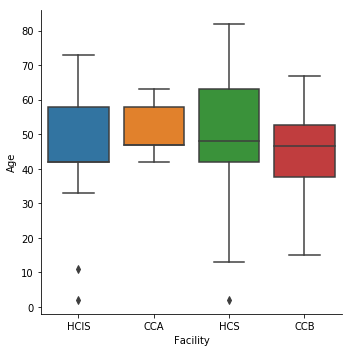

In [9]:
sns.catplot(x="Facility", y="Age", kind="box", data=data);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

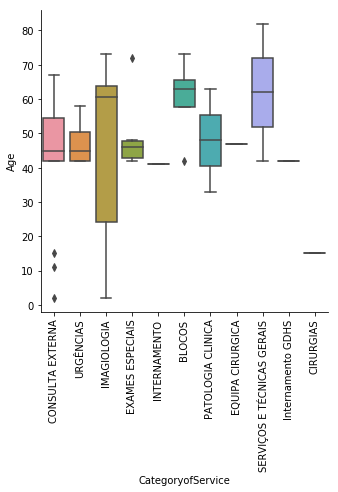

In [17]:
sns.catplot(x="CategoryofService", y="Age", kind="box", data=data);
plt.xticks(rotation=90)

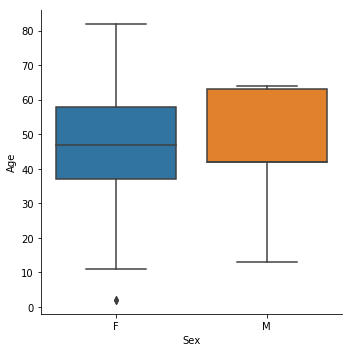

In [11]:
sns.catplot(x="Sex", y="Age", kind="box", data=data);

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

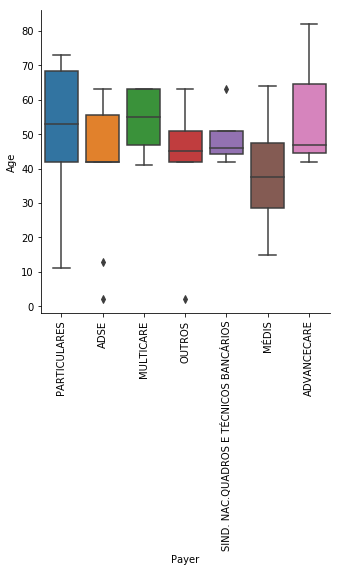

In [12]:
sns.catplot(x="Payer", y="Age", kind="box", data=data);
plt.xticks(rotation=90)

## Violin Plots

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

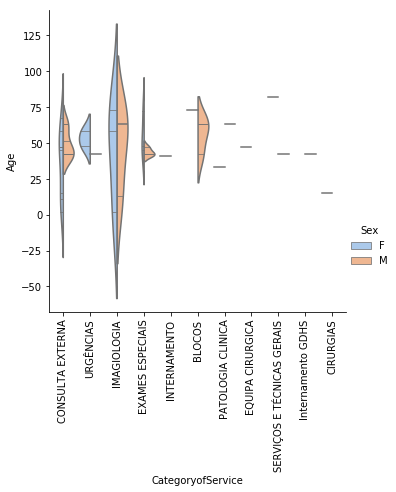

In [64]:
sns.catplot(x="CategoryofService", y="Age", hue="Sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=data);
plt.xticks(rotation=90)

## Histograms 

### Histogram of average age grouped by a categorical variable

In [76]:
# Average age for each sex
Sex_by_Age = data.groupby("Sex")["Age"].mean()
Sex_by_Age.head()

Sex
F    45.434783
M    48.333333
Name: Age, dtype: float64

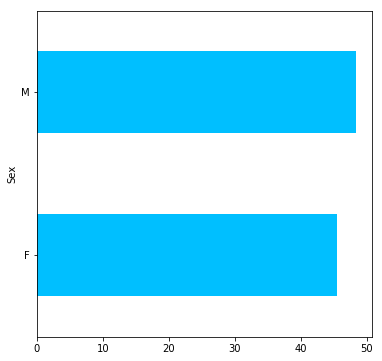

In [77]:
Sex_by_Age.plot.barh(color="deepskyblue");

In [84]:
# Average age for each category of service
CategoryofService_by_Age = data.groupby("CategoryofService")["Age"].mean()
CategoryofService_by_Age.head()

CategoryofService
BLOCOS              60.250000
CIRURGIAS           15.000000
CONSULTA EXTERNA    42.466667
EQUIPA CIRURGICA    47.000000
EXAMES ESPECIAIS    49.333333
Name: Age, dtype: float64

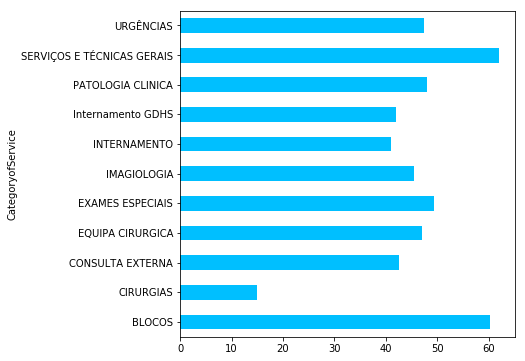

In [85]:
CategoryofService_by_Age.head(15).plot.barh(color="deepskyblue");

In [89]:
# Average age for each specific service
Service_by_Age = data.groupby("SpecificService")["Age"].mean()
Service_by_Age

SpecificService
ANESTESIA                               42.000000
BLOCO CIRURGIA AMBULATÓRIO              63.000000
BLOCO DE PARTOS                         63.000000
BLOCO OPERATORIO CENTRAL                33.000000
CARDIOLOGIA                             61.333333
CIRURGIA TORÁCICA                       73.000000
DIÁRIAS                                 67.000000
ECOGRAFIA                               33.000000
ENDOCRINOLOGIA                          42.000000
ENDOSCOPIA                              42.000000
GASTROENTEROLOGIA                       70.000000
Internamento GDHS                       42.000000
MEDICINA GERAL E FAMILIAR               47.000000
NEURO-CIRURGIA                          36.000000
OFTALMOLOGIA                            13.000000
PATOLOGIA CLINICA                       68.000000
PNEUMOLOGIA                             42.000000
RECOBRO                                 58.000000
RESSONÂNCIA                             39.000000
REUMATOLOGIA                      

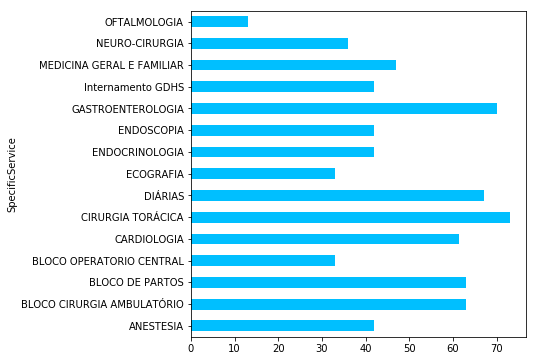

In [90]:
Service_by_Age.head(15).plot.barh(color="deepskyblue");

## Pie Charts

In [69]:
data.Age.head(10)

0    58
1    58
2    58
3    58
4    48
5    48
6    41
7    51
8    73
9    73
Name: Age, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc17cf39c18>],
      dtype=object)

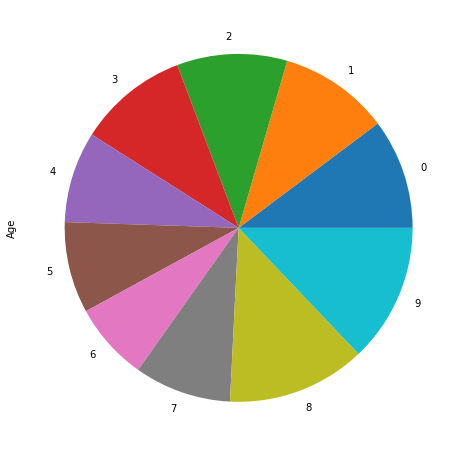

In [26]:
data.Age.head(10).plot(kind='pie', subplots=True, figsize=(8, 8))

In [74]:
# Commented out due to error code 

#data_f = data["Facility"]
#data_f.plot(kind='pie', figsize=(8, 8))

## Heatmaps

In [59]:
def pivot_count(df, rows, columns):
    df_pivot = df.pivot_table(values="UniqueID",
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.size
                             ).dropna(axis=0, how='all')
    return df_pivot

In [60]:
def heatmap_count(df, col1, col2):
    pivot_table = pivot_count(df,col1, col2)
    sns.heatmap(pivot_table, annot=True, fmt='g')
    plt.ylabel(col1)
    plt.xlabel(col2)
    plt.show()

In [62]:
# IMPORTANT : With large dataset, make sure to remove columns with a high cardinality
# Ideally have type for all of these 
interact(heatmap_count, col1=data.columns.drop(["UniqueID", "Age", "SpecificService"]),
                                 col2=data.columns.drop(["UniqueID", "Age", "SpecificService"]),
                                 df=fixed(data));

interactive(children=(Dropdown(description='col1', options=('Facility', 'Payer', 'CategoryofService', 'Sex'), …

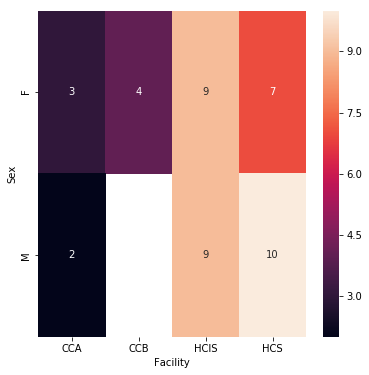

In [75]:
heatmap_count(data, "Sex","Facility")